In [206]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math as m
import pandas as pd
import seaborn as sns

## Reading the data

In [207]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there aren't data with null statements, so there is no need to transform it. But it is visible that there are tabs in column names, so it would be better to rename it for sufficient use in future.

In [209]:
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

Since 'income' is our target variable, it's better to make it numerical for easier computation. I will create a new variable derived from the 'income' - 'income_encoded'.

In [210]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [211]:
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['income_encoded'].unique()

array([0, 1])

In [212]:
df.sample(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income,income_encoded
20103,24,Private,141040,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K,0
12333,18,Private,256967,10th,6,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K,0


## Analysing data

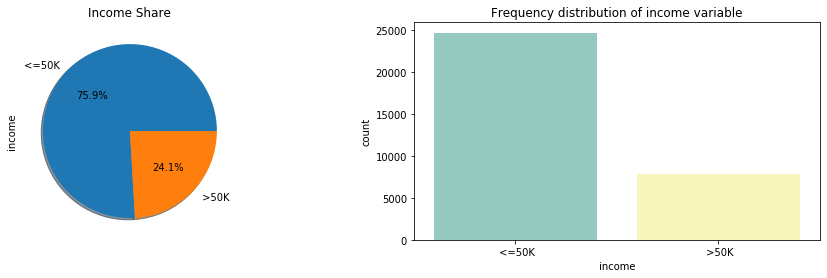

In [213]:
f,ax = plt.subplots(1,2,figsize=(16,4))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')
ax[1] = sns.countplot(x="income", data=df, palette="Set3")
ax[1].set_title("Frequency distribution of income variable")
plt.show()

### Plotting numeric data

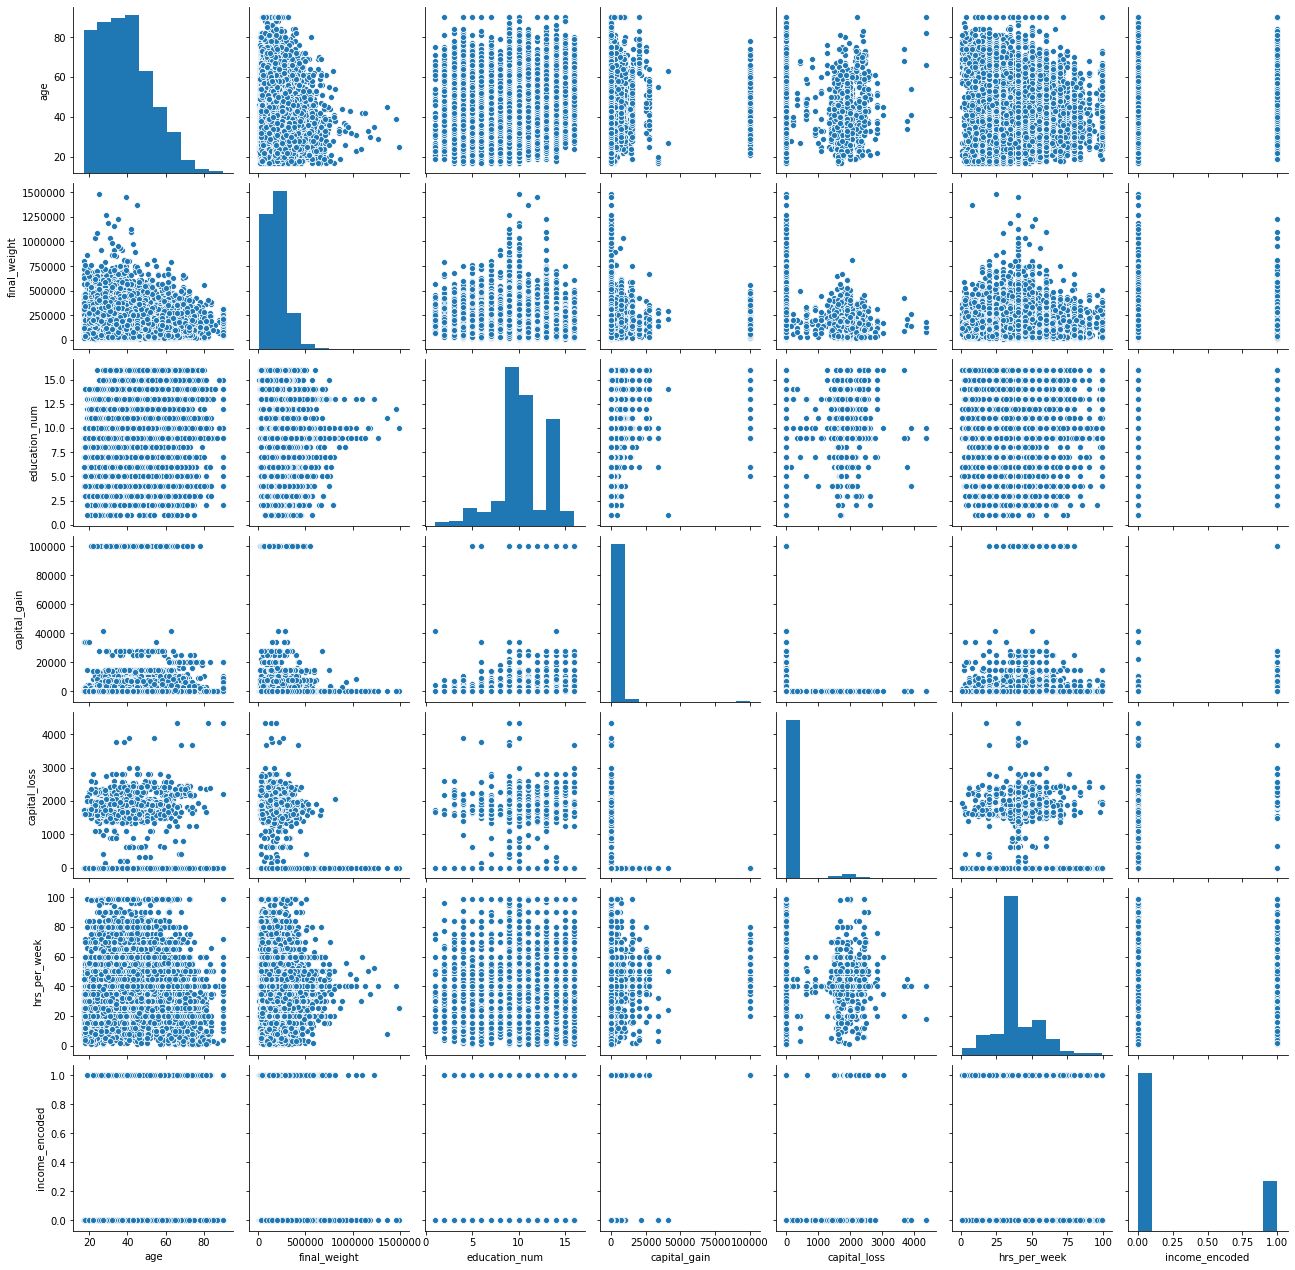

In [214]:
sns.pairplot(df)
plt.show()

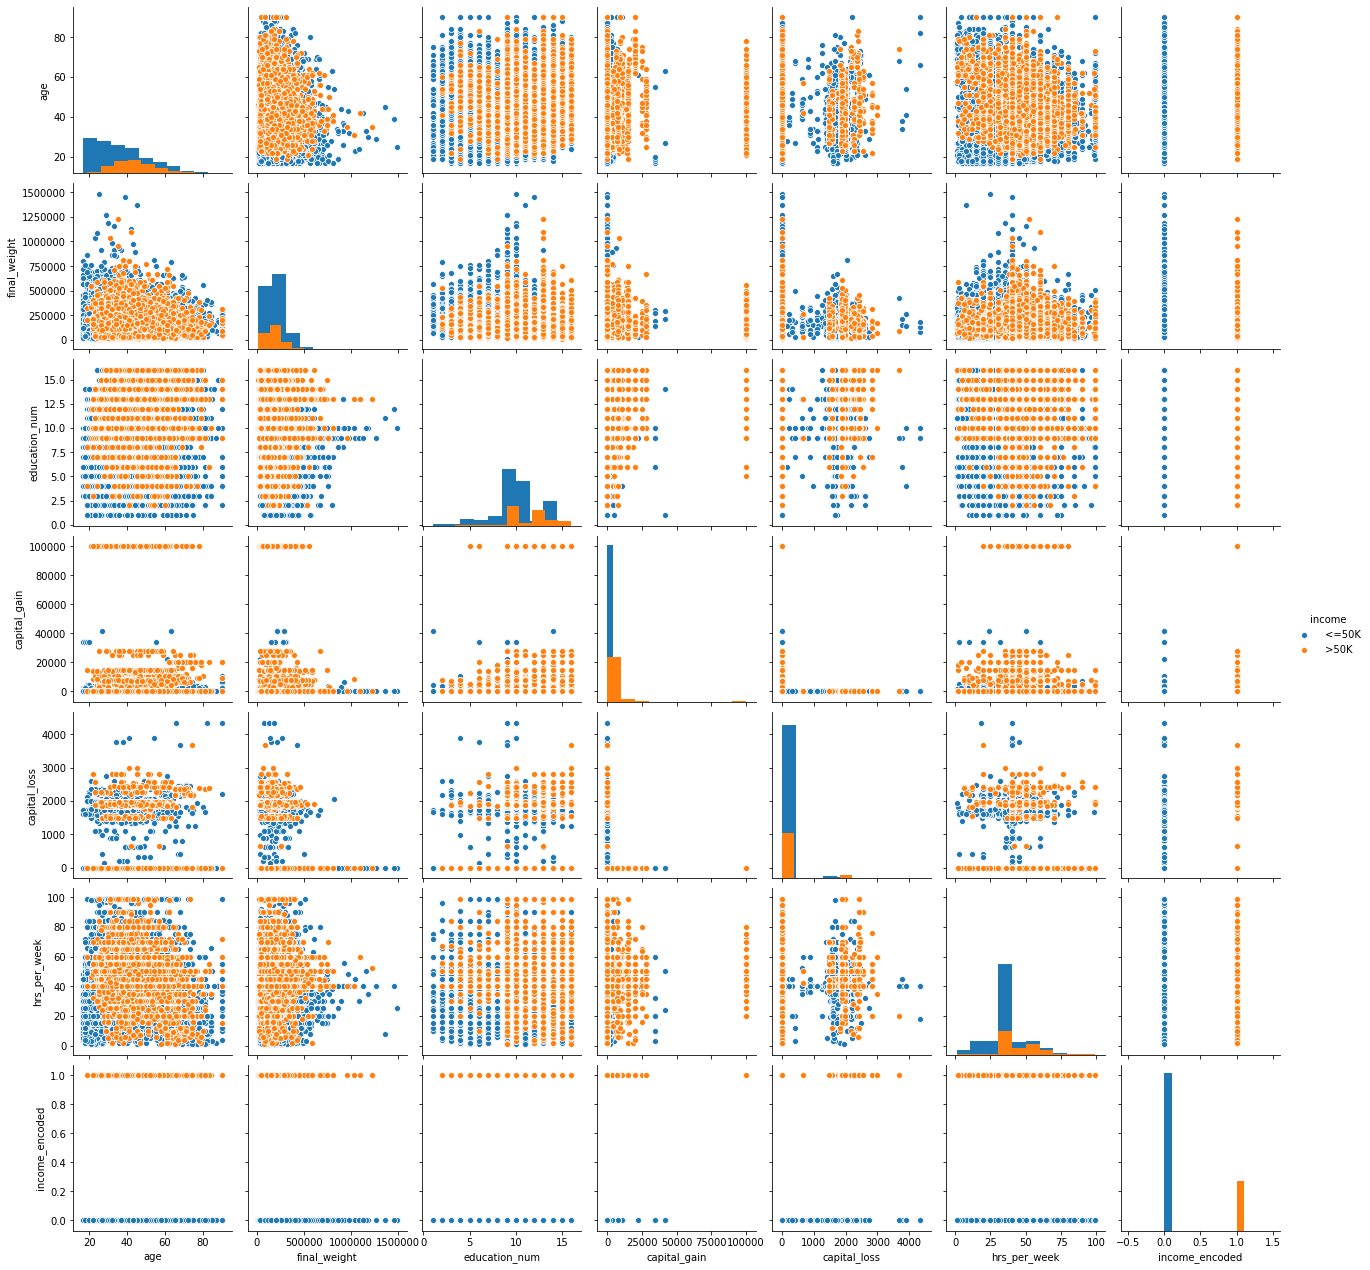

In [215]:
sns.pairplot(df, hue="income", diag_kind='hist')
plt.show()

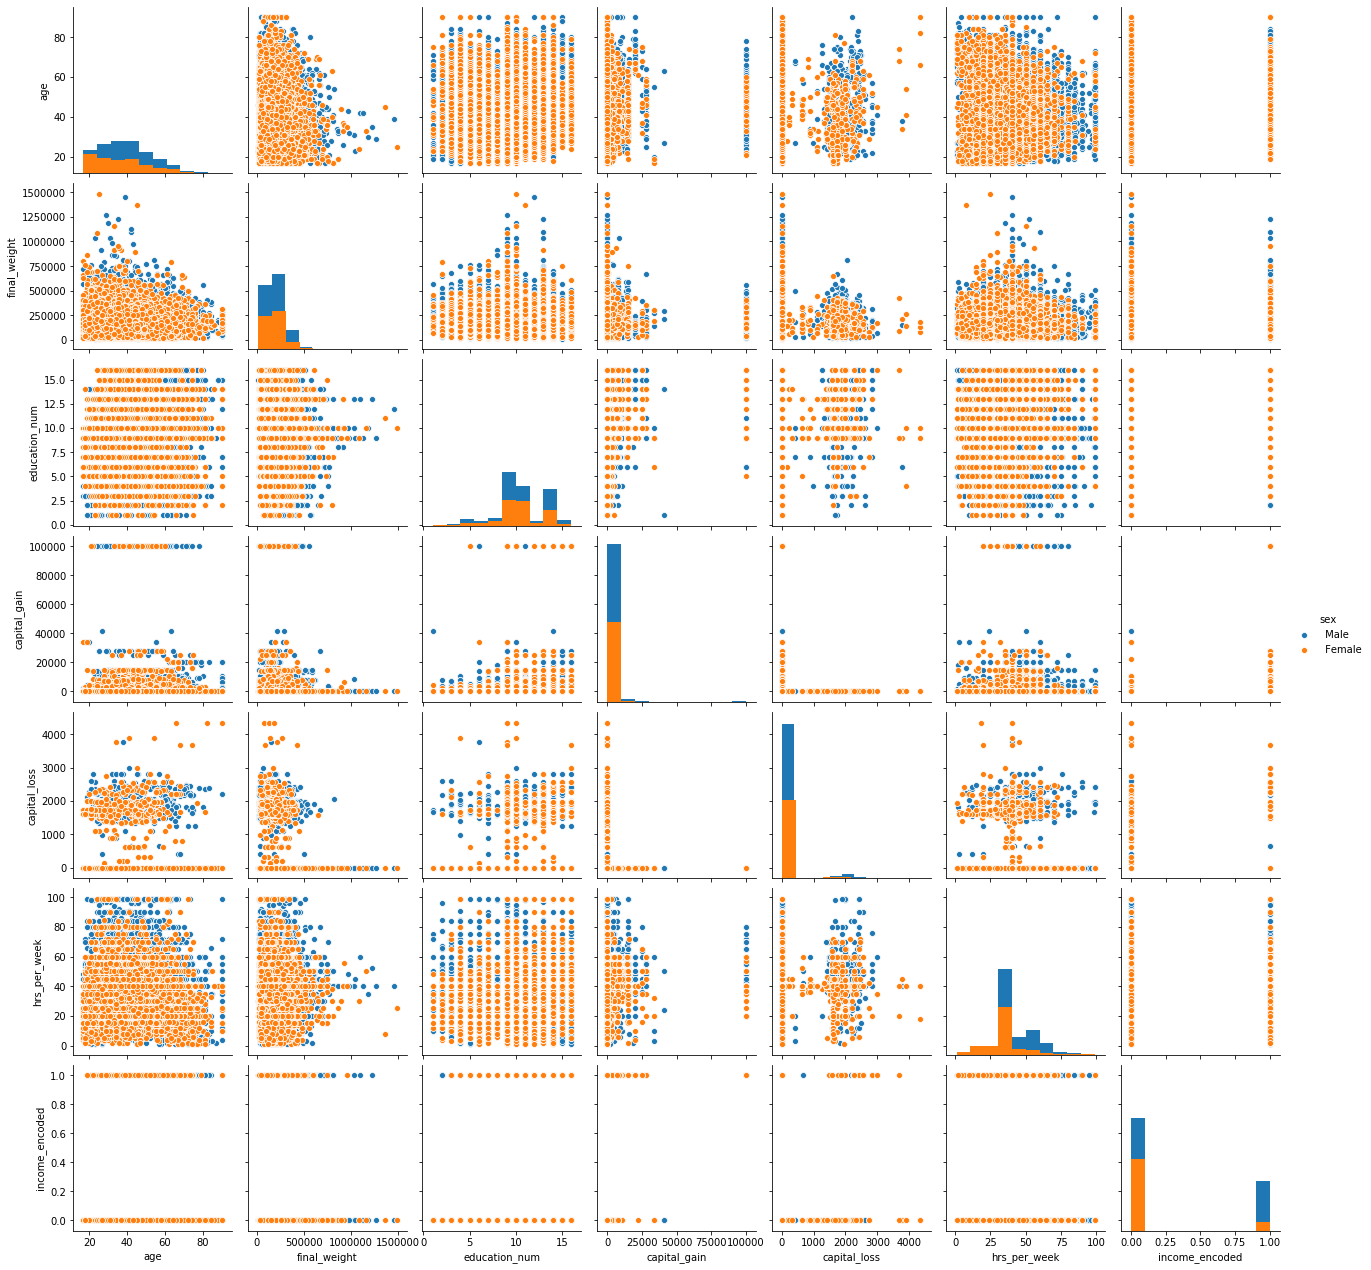

In [216]:
sns.pairplot(df, hue="sex", diag_kind='hist')
plt.show()

### Discovering categorical data

We can discover sexism in this data!!!

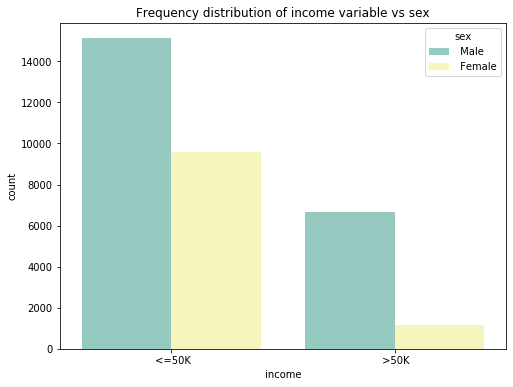

In [217]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set3")
ax.set_title("Frequency distribution of income variable vs sex")
plt.show()

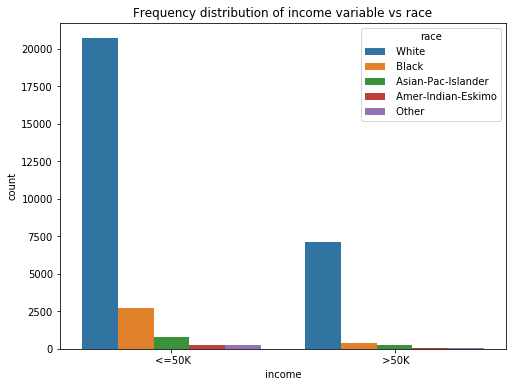

In [218]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Frequency distribution of income variable vs race")
plt.show()

We can see, that most people are white in both categories of incomes, that's why I was interested in race distribution at all.  

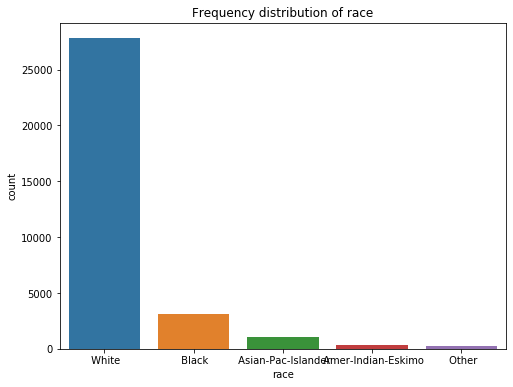

In [219]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="race", data=df)
ax.set_title("Frequency distribution of race")
plt.show()

As we can see now, the reason of shown above results is that the distribution of white people in this dataset is much bigger than other races.

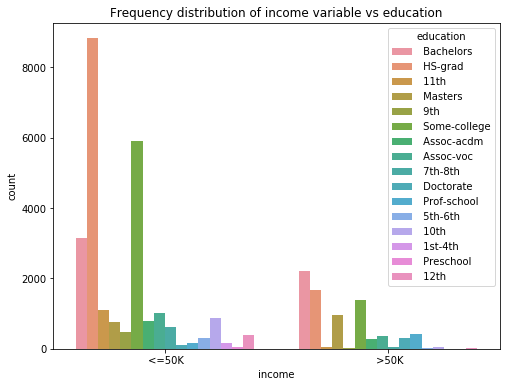

In [220]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="education", data=df)
ax.set_title("Frequency distribution of income variable vs education")
plt.show()

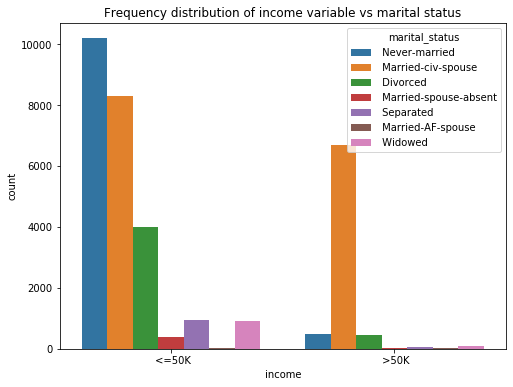

In [221]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="marital_status", data=df)
ax.set_title("Frequency distribution of income variable vs marital status")
plt.show()

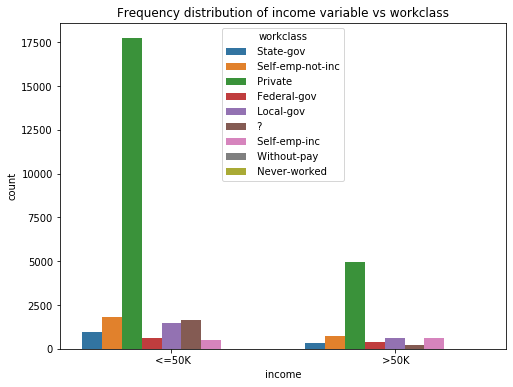

In [222]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="workclass", data=df)
ax.set_title("Frequency distribution of income variable vs workclass")
plt.show()

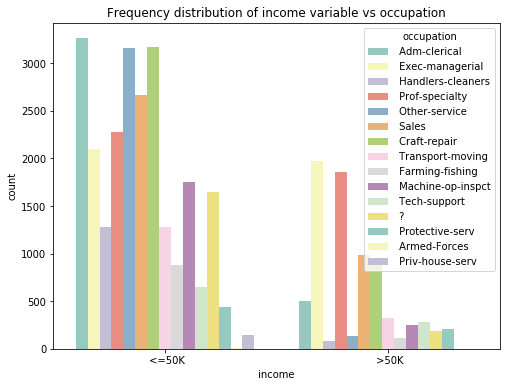

In [223]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="occupation", data=df, palette="Set3")
ax.set_title("Frequency distribution of income variable vs occupation")
plt.show()

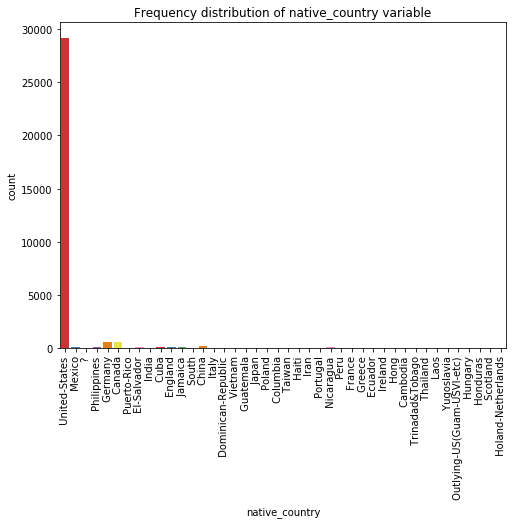

In [224]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="native_country", data=df, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

### Corelation between different features

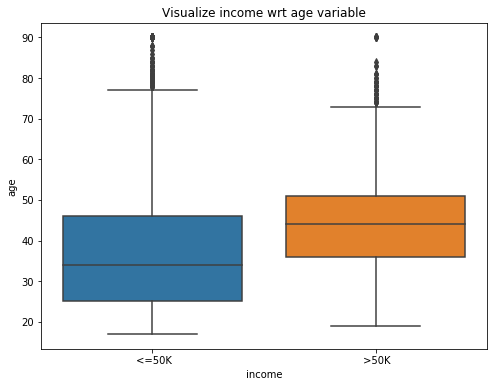

In [225]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

<Figure size 432x288 with 0 Axes>

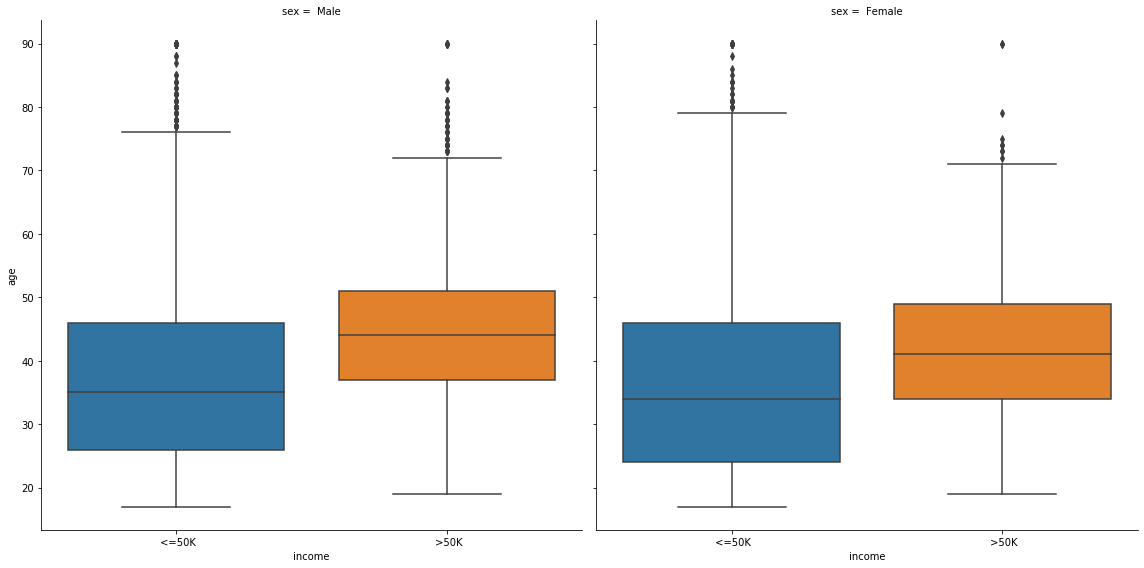

In [226]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

From these graphics we can see that older people make more many in both sex categories.

## Prepearing data 

As we have seen from graph above, the corelation of country isn't important, because most of data participants are Us native. That's why I decided to drop it from the model.

In [227]:
X = df.drop(['income', 'native_country'], axis=1)
#X = df.drop(['final_weight', 'native_country', 'education_num', 'income', 'income_encoded'], axis=1)
y = df['income_encoded']
X.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [229]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [230]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print(categorical) 
print(numerical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']
['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hrs_per_week', 'income_encoded']


### Encoding categorical data

In [231]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male


In [232]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex'])
#'native_country'

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [233]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,race_2,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hrs_per_week,income_encoded
32098,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,7298,0,60,1
25206,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1831,0,38,0
23491,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,50,1
12367,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,40,0
7054,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,25,0


In [234]:
X_train.shape

(22792, 67)

In [235]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,race_2,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hrs_per_week,income_encoded
22278,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,44,0
8950,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,40,0
7838,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,40,0
16505,46,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1902,40,0
19140,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2824,76,1


In [236]:
X_test.shape

(9769, 67)

We can see that now we have 67 columns instead of 15

## Logistic Regression Sklearn 

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = LogisticRegression()

In [238]:
reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
reg.score(X_train, y_train)

0.9431379431379432

In [240]:
y_test_pred = reg.predict(X_test)

In [241]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

average_precision = average_precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)

average precision:  0.8094526472268225
recall:  0.9006416796615601


### Errors evaluation

In [242]:
rms = m.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred) 
mae = mean_absolute_error(y_test, y_test_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)


RMSE: 0.23985186679685683
MSE:  0.057528918005937145
MAE:  0.057528918005937145


## Random Forrest Classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=0,n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [244]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9983621660354182

In [245]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

average_precision = average_precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)

average precision:  0.9948639135581466
recall:  0.9966130397967824


### Errors evaluation

In [246]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.04047016141037543
MSE:  0.0016378339645818406
MAE:  0.0016378339645818406


## Custom Logistic Regression 

In [247]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [248]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
    plt.show()

In [249]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [250]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [251]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [252]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [253]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        #theta = theta -(1/m)*alpha*( X.T.dot((h(X, theta) - y)))
        #theta = theta - alpha*(1/m)*(np.dot(X.T, (h(X, theta)-y.T).T))
        #theta = theta -(1/m)*alpha*((X.T.dot(h(X, theta) - y)))
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [254]:
def predict(X, mean, std, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [257]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [258]:
X_train.shape

(22792, 67)

In [259]:
theta =np.array(67*[0])

In [260]:
X_new, mean, std = normalize(X_train)

In [261]:
cost_function(X_train, y_train, theta)

0.6931471805599453

In [262]:
new_theta, Js = gradient_descent(X_train, y_train, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


[ 1.30211647e+01 -1.41260969e-01  6.27413127e-03  3.61019217e-02
 -7.61236399e-02  4.73495086e-02  9.00796332e-02  4.51739645e-02
 -1.12956300e-03 -2.03141453e-04 -1.33391090e+03 -2.47563838e-01
 -1.02214154e-01 -3.44443226e-02  2.78685284e-01  7.58871534e-02
 -4.65990260e-02  1.67260004e-01 -6.63028694e-02  4.70208845e-03
 -1.02430677e-02  5.87925588e-03 -2.90145665e-02 -1.87385925e-02
 -3.68638119e-03 -2.13033082e-02  5.39581871e-02  3.55968871e+00
  9.30181643e-01 -1.82503071e-01 -6.24750790e-01 -5.05181643e-02
 -4.84444103e-02 -1.88798701e-02  1.17650930e-03 -1.48714461e-02
 -1.17918349e-01  2.85306248e-02  2.44863329e-01 -3.53643822e-02
 -7.63267813e-02 -7.21983591e-02 -1.97302343e-01 -1.62317919e-02
  3.00131845e-01 -6.79409442e-02  2.12469287e-02  1.89693752e-02
 -8.95116708e-03 -3.74692875e-04  8.29536899e-01 -1.83198929e-01
 -3.48036153e-01 -3.41212926e-01 -5.89329589e-02  1.08105914e-01
  1.28415672e-01  1.17556599e-02 -1.07188707e-01 -1.37388119e-02
 -1.29819674e-02  4.33859

In [263]:
y_pred = h(X_test, new_theta)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


### Errors evaluation

In [264]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.4871151769538639
MSE:  0.23728119561879416
MAE:  0.23728119561879416


In [265]:
average_precision = average_precision_score(y_test, y_pred)
recall = recall_score(y_test, y_test_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)

average precision:  0.255909476736491
recall:  0.9006416796615601


We discovered that Random Forest Classifier has the best precision and the least error. Nevertheless, simple sklearn logistic regression  works good, custom regression - a bit worse.